In [11]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#Data Loading
df = pd.read_csv("/content/sample_data/ds_salaries.csv")

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# Creating a DataFrame copy
df_copy = df.copy()
df_copy['salary_in_usd'].mean()

np.float64(137570.38988015978)

In [15]:
#Data Profiling
#Shows concise summary of DataFrame including colum name,data types, non-null counts, and memory usage
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [16]:
#Display the first five rows
df_copy.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [17]:
#Display the first last rows
df_copy.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [18]:
# Summary statistics
df_copy.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [19]:
#Step 2: Data Quality Checks

# Checking for sum of null values
df_copy.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [20]:
"""
    # No nulls, so  dropna not needed
    df_copy.isnull().sum()

    if our data contain missing value then we should Handle missing values (e.g., fill with median for numerical,
    mode for categorical, or drop columns with excessive missing data).

"""

'\n    # No nulls, so  dropna not needed\n    df_copy.isnull().sum()\n\n    if our data contain missing value then we should Handle missing values (e.g., fill with median for numerical,\n    mode for categorical, or drop columns with excessive missing data).\n\n'

In [21]:
#print(df_copy['employee_residence'].unique)

print(sorted(df['employee_residence'].unique()))
print(sorted(df['remote_ratio'].unique()))



['AE', 'AM', 'AR', 'AS', 'AT', 'AU', 'BA', 'BE', 'BG', 'BO', 'BR', 'CA', 'CF', 'CH', 'CL', 'CN', 'CO', 'CR', 'CY', 'CZ', 'DE', 'DK', 'DO', 'DZ', 'EE', 'EG', 'ES', 'FI', 'FR', 'GB', 'GH', 'GR', 'HK', 'HN', 'HR', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IR', 'IT', 'JE', 'JP', 'KE', 'KW', 'LT', 'LU', 'LV', 'MA', 'MD', 'MK', 'MT', 'MX', 'MY', 'NG', 'NL', 'NZ', 'PH', 'PK', 'PL', 'PR', 'PT', 'RO', 'RS', 'RU', 'SE', 'SG', 'SI', 'SK', 'TH', 'TN', 'TR', 'UA', 'US', 'UZ', 'VN']
[np.int64(0), np.int64(50), np.int64(100)]


In [22]:
# counting  duplicates rows
df_copy.duplicated().sum()

np.int64(1171)

In [23]:
# Remove duplicate rows
df_copy = df_copy.drop_duplicates()


In [24]:
#now Checking for number of rows after removing duplicate rows
len(df_copy)

2584

In [25]:
# Check DataFrame shape
df_copy.shape

(2584, 11)

In [26]:
# Check total number of elements
df_copy.size          #size = no of rows * columns

28424

In [27]:
# Check data types of each column
df_copy.dtypes


,0
work_year,int64
experience_level,object
employment_type,object
job_title,object
salary,int64
salary_currency,object
salary_in_usd,int64
employee_residence,object
remote_ratio,int64
company_location,object


In [28]:
# Convert object columns to category
categorical_cols = ['experience_level', 'employment_type', 'job_title',
                    'salary_currency', 'employee_residence',
                    'company_location', 'company_size']

for col in categorical_cols:
    df_copy[col] = df_copy[col].astype('category')


In [29]:
# Verify updated data types
df_copy.dtypes


,0
work_year,int64
experience_level,category
employment_type,category
job_title,category
salary,int64
salary_currency,category
salary_in_usd,int64
employee_residence,category
remote_ratio,int64
company_location,category


In [30]:
#Geting all unique job titles from the 'job_title' column and print them
unique_job_titles = df_copy["job_title"].unique()
print(unique_job_titles)

['Principal Data Scientist', 'ML Engineer', 'Data Scientist', 'Applied Scientist', 'Data Analyst', ..., 'Head of Machine Learning', 'Principal Data Analyst', 'Principal Data Engineer', 'Staff Data Scientist', 'Finance Data Analyst']
Length: 93
Categories (93, object): ['3D Computer Vision Researcher', 'AI Developer', 'AI Programmer', 'AI Scientist', ...,
                          'Research Scientist', 'Software Data Engineer', 'Staff Data Analyst',
                          'Staff Data Scientist']


In [31]:
selected_job_titles = [
    'Data Scientist',
    'Machine Learning Engineer',
    'Data Analyst',
    'Data Engineer',
    'AI Developer',
    'Business Data Analyst',
    'Big Data Engineer',
    'NLP Engineer',
    'Deep Learning Researcher',
    'AI Scientist'
]

#isin() filters rows based on whether column values belong to a given list.

df_copy = df_copy[df_copy["job_title"].isin(selected_job_titles)]

# Remove unused categories from 'job_title' column
#.cat gives tools to work with category data.
df_copy['job_title'] = df_copy['job_title'].cat.remove_unused_categories()

# Now check unique job titles present
print(df_copy['job_title'].unique())


['Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Data Engineer', 'AI Developer', 'Business Data Analyst', 'Big Data Engineer', 'AI Scientist', 'Deep Learning Researcher', 'NLP Engineer']
Categories (10, object): ['AI Developer', 'AI Scientist', 'Big Data Engineer',
                          'Business Data Analyst', ..., 'Data Scientist', 'Deep Learning Researcher',
                          'Machine Learning Engineer', 'NLP Engineer']


In [32]:
# And counts only for existing categories
df_copy['job_title'].value_counts()

,count
job_title,
Data Engineer,598
Data Scientist,538
Data Analyst,396
Machine Learning Engineer,206
AI Scientist,16
Business Data Analyst,15
AI Developer,11
Big Data Engineer,11
NLP Engineer,7


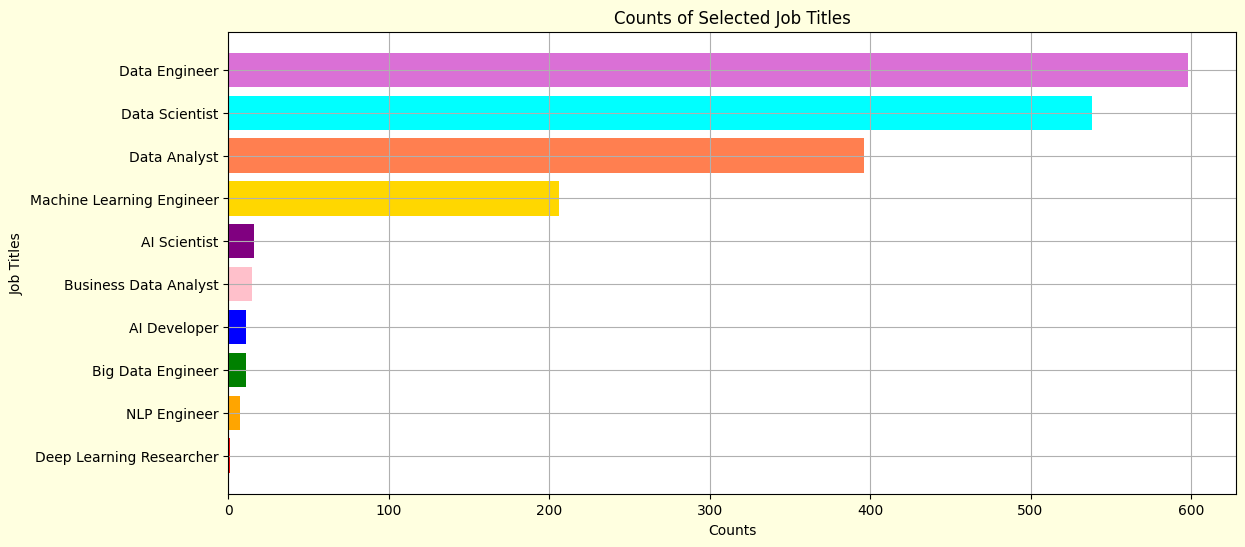

In [33]:
job_titles = [
    'Deep Learning Researcher','NLP Engineer','Big Data Engineer', 'AI Developer',
    'Business Data Analyst','AI Scientist','Machine Learning Engineer','Data Analyst',
    'Data Scientist','Data Engineer'


]

counts = [1,7,11,11,15,16,206,396,538,598]
colors = ['red', 'orange', 'green', 'blue', 'pink',
          'purple', 'gold', 'coral', 'aqua', 'orchid']
plt.figure(figsize=(13, 6), facecolor='lightyellow')


plt.barh(job_titles, counts, color=colors)
plt.xlabel('Counts')
plt.ylabel('Job Titles')
plt.title('Counts of Selected Job Titles')
plt.grid(True)
plt.show()

In [34]:
df_copy['salary_in_usd'].describe()

,salary_in_usd
count,1799.000000
mean,129698.933296
std,64139.595228
min,5132.000000
25%,82432.500000
50%,125000.000000
75%,170000.000000
max,430967.000000


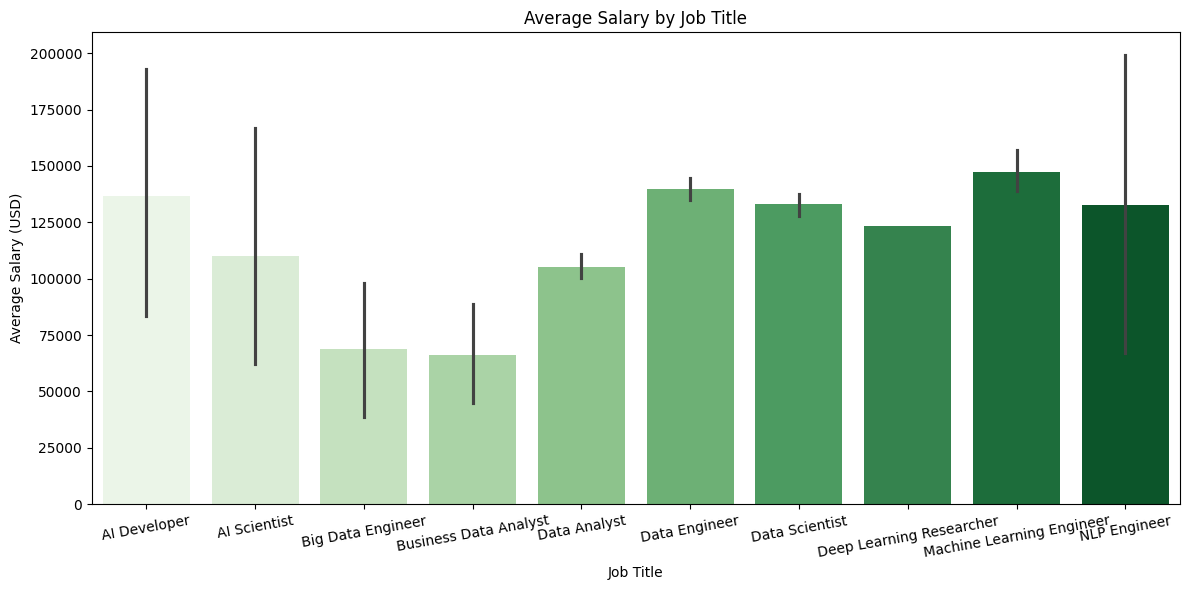

In [35]:
filtered_df = df_copy[df_copy['job_title'].isin(job_titles)]

plt.figure(figsize=(12, 6))
sns.barplot( data=filtered_df, x='job_title', y='salary_in_usd', hue='job_title',  estimator='mean', palette='Greens', legend=False )
plt.xticks(rotation=10)
plt.title('Average Salary by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary (USD)')
plt.tight_layout()
plt.show()

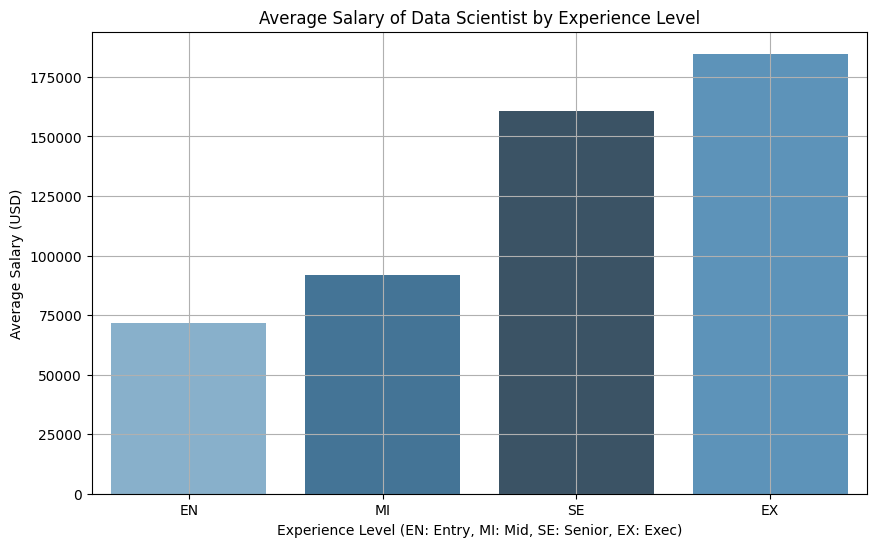

In [36]:
# Filter only Data Scientist rows
ds_df = df_copy[df_copy['job_title'] == 'Data Scientist']

# Define experience level order
experience_order = ['EN', 'MI', 'SE', 'EX']

# Plot average salary by experience level for Data Scientists
plt.figure(figsize=(10, 6))
sns.barplot(x='experience_level', y='salary_in_usd', hue='experience_level', data=ds_df, order=experience_order,
            estimator='mean', palette='Blues_d',errorbar=None )

plt.title('Average Salary of Data Scientist by Experience Level')
plt.xlabel('Experience Level (EN: Entry, MI: Mid, SE: Senior, EX: Exec)')
plt.ylabel('Average Salary (USD)')
plt.grid()
plt.show()

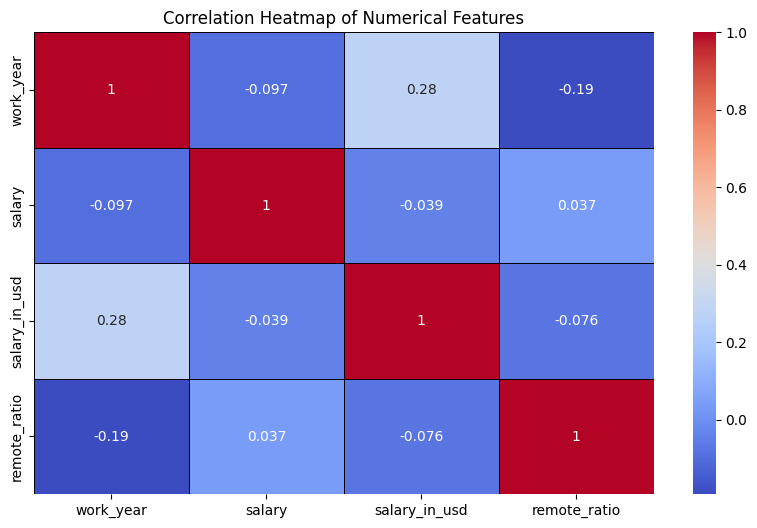

In [37]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_copy.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


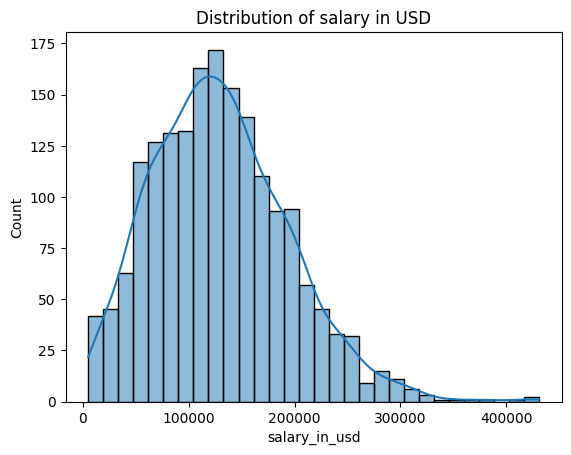

In [38]:
# Distribution of target variable (e.g., charges)
sns.histplot(df_copy['salary_in_usd'], kde=True)
plt.title('Distribution of salary in USD')
plt.show()

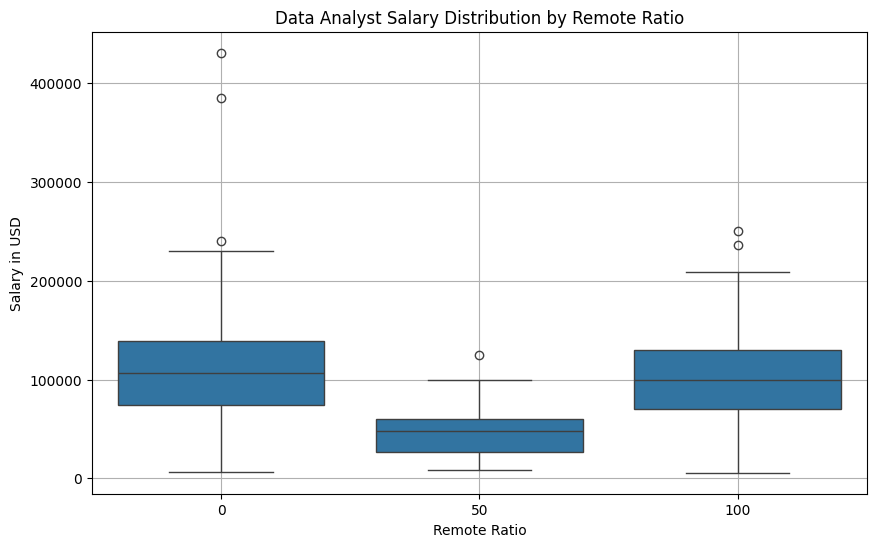

In [41]:
#visualizing how salary varies across different company sizes using a boxplot.
# Filter for Data Analyst
#outlier detection
# Filter for Data Analyst
ds_df = df_copy[df_copy['job_title'] == 'Data Analyst'].copy()

# If remote_ratio is numeric or categorical, you can order it if needed
# For example, if remote_ratio is categorical like ['0%', '50%', '100%'], define order
ds_df['remote_ratio'] = ds_df['remote_ratio'].astype(int)

# Define remote_ratio_order
remote_ratio_order = sorted(ds_df['remote_ratio'].unique())

plt.figure(figsize=(10, 6))
sns.boxplot(x='remote_ratio', y='salary_in_usd', data=ds_df, order=remote_ratio_order)
plt.title('Data Analyst Salary Distribution by Remote Ratio')
plt.xlabel('Remote Ratio')
plt.ylabel('Salary in USD')
plt.grid()
plt.show()

In [42]:
# Filter for Data Analyst
ds_df = df_copy[df_copy['job_title'] == 'Data Analyst']

# Outlier detection and removal using IQR method on salary_in_usd

Q1 = ds_df['salary_in_usd'].quantile(0.25)
Q3 = ds_df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
ds_df_no_outliers = ds_df[(ds_df['salary_in_usd'] >= lower_bound) & (ds_df['salary_in_usd'] <= upper_bound)]

# Sort or specify remote_ratio order (adjust based on your data)
remote_ratio_order = sorted(ds_df_no_outliers['remote_ratio'].unique())






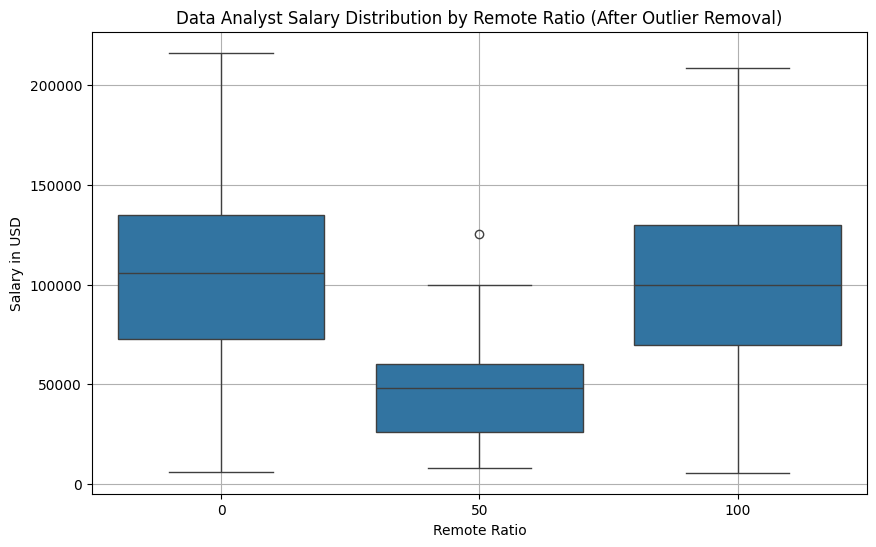

In [43]:
# Plot boxplot for salary vs remote_ratio after outlier removal
plt.figure(figsize=(10, 6))
sns.boxplot(x='remote_ratio', y='salary_in_usd', data=ds_df_no_outliers, order=remote_ratio_order)
plt.title('Data Analyst Salary Distribution by Remote Ratio (After Outlier Removal)')
plt.xlabel('Remote Ratio')
plt.ylabel('Salary in USD')
plt.grid()
plt.show()


In [44]:
#feature engineering


#  a copy to avoid SettingWithCopyWarning
ds_df_no_outliers = ds_df_no_outliers.copy()

#readable format
def categorize_remote_ratio(ratio):
    if ratio == 0:
        return 'No Remote'
    elif ratio == 100:
        return 'Full Remote'
    else:
        return 'Partial Remote'

ds_df_no_outliers['remote_category'] = ds_df_no_outliers['remote_ratio'].apply(categorize_remote_ratio)


In [45]:
#Splits salary into defined ranges.
salary_bins = [0, 50000, 100000, 150000, 200000, ds_df_no_outliers['salary_in_usd'].max()]
salary_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

ds_df_no_outliers['salary_category'] = pd.cut(ds_df_no_outliers['salary_in_usd'], bins=salary_bins, labels=salary_labels)


In [46]:
# Creating a feature that shows salary normalized by remote ratio.
# Helps us understand how much salary is offered per unit of remote flexibility.
# The '+1' prevents division by zero when remote_ratio is 0.

ds_df_no_outliers['salary_per_remote'] = ds_df_no_outliers['salary_in_usd'] / (ds_df_no_outliers['remote_ratio'] + 1)

print(ds_df_no_outliers['salary_per_remote'])


11        1287.128713
12         990.099010
19        1485.148515
20        1089.108911
37      105380.000000
            ...      
3645       710.752475
3674       841.584158
3681       156.862745
3736     75000.000000
3737     62000.000000
Name: salary_per_remote, Length: 389, dtype: float64


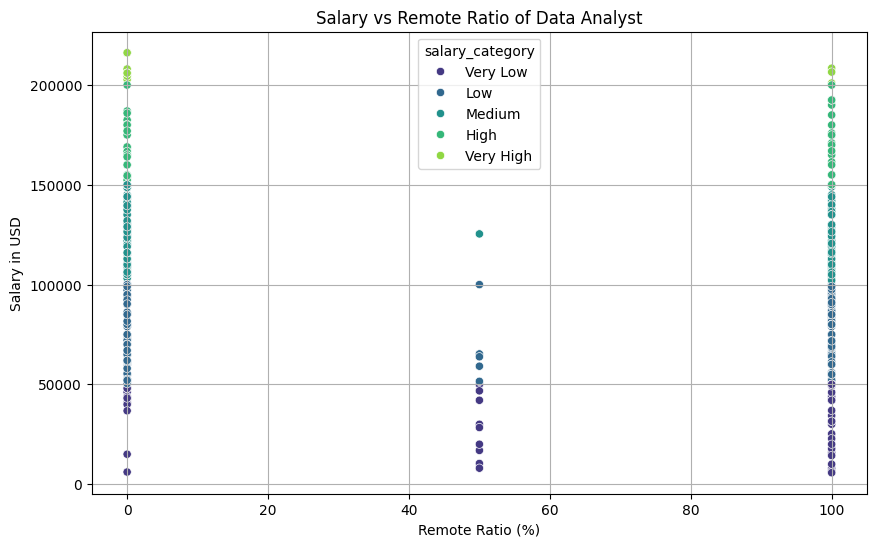

In [47]:

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='remote_ratio',
    y='salary_in_usd',
    hue='salary_category',
    data=ds_df_no_outliers,
    palette='viridis'
)
plt.title('Salary vs Remote Ratio of Data Analyst')
plt.xlabel('Remote Ratio (%)')
plt.ylabel('Salary in USD')
plt.grid(True)
plt.show()
